# STAT 3612 Assignment 2: HELOC Data Modeling
Name: Nyeongmin Lee<br>
UID: 3035401370<br>
Date: Oct 15 - , Nov 6 2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("HelocData.csv", na_values = [-7, -8, -9])
df.head(10)

,RiskFlag,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
0,Bad,75.0,169.0,2.0,59.0,21.0,0.0,0.0,100.0,NaN,...,36.0,NaN,4.0,4.0,43.0,112.0,4.0,6.0,0.0,83.0
1,Bad,66.0,502.0,4.0,145.0,34.0,0.0,0.0,97.0,36.0,...,27.0,4.0,3.0,3.0,80.0,53.0,17.0,3.0,12.0,83.0
2,Good,69.0,338.0,2.0,62.0,22.0,0.0,0.0,96.0,12.0,...,35.0,0.0,4.0,4.0,25.0,100.0,3.0,2.0,1.0,45.0
3,Good,75.0,422.0,1.0,91.0,55.0,0.0,0.0,100.0,NaN,...,33.0,0.0,4.0,4.0,2.0,11.0,12.0,2.0,1.0,57.0
4,Bad,63.0,242.0,2.0,68.0,25.0,0.0,0.0,100.0,NaN,...,19.0,NaN,3.0,3.0,73.0,NaN,12.0,1.0,5.0,87.0
5,Bad,74.0,193.0,1.0,91.0,19.0,0.0,0.0,100.0,NaN,...,18.0,NaN,1.0,1.0,90.0,79.0,6.0,2.0,4.0,73.0
6,Bad,58.0,247.0,2.0,62.0,30.0,0.0,0.0,94.0,1.0,...,34.0,9.0,0.0,0.0,62.0,70.0,5.0,2.0,2.0,89.0
7,Good,89.0,203.0,6.0,79.0,28.0,0.0,0.0,97.0,62.0,...,53.0,20.0,0.0,0.0,8.0,90.0,1.0,2.0,0.0,33.0
8,Good,89.0,357.0,1.0,125.0,15.0,0.0,0.0,100.0,NaN,...,39.0,NaN,1.0,0.0,6.0,31.0,4.0,2.0,0.0,55.0
9,Bad,63.0,240.0,4.0,64.0,20.0,1.0,0.0,86.0,45.0,...,10.0,4.0,1.0,1.0,67.0,NaN,6.0,1.0,3.0,70.0


In [2]:
data_dict = pd.read_excel('./HelocDataDict.xlsx', index_col=0, squeeze=True)
var_names = data_dict.str.split('(\.| \()', expand=True).iloc[1:,0] # only select the first part
var_names.name = 'Description'

var_names.to_frame()

,Description
Variable Names,
x1,Consolidated version of risk markers
x2,Months Since Oldest Trade Open
x3,Months Since Most Recent Trade Open
x4,Average Months in File
x5,Number Satisfactory Trades
x6,Number Trades 60+ Ever
x7,Number Trades 90+ Ever
x8,Percent Trades Never Delinquent
x9,Months Since Most Recent Delinquency


In [3]:
# RiskFlag 'Good'=1, 'Bad'=0
df['RiskFlag'].replace(('Good', 'Bad'), (1, 0), inplace=True)

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(3035401370)
train, test = train_test_split(df,test_size=0.2)

train.head()

,RiskFlag,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
7742,1,83.0,238.0,3.0,128.0,54.0,0.0,0.0,100.0,NaN,...,27.0,3.0,1.0,1.0,8.0,27.0,4.0,3.0,1.0,47.0
92,1,86.0,249.0,13.0,108.0,21.0,0.0,0.0,100.0,NaN,...,29.0,13.0,0.0,0.0,4.0,28.0,5.0,1.0,0.0,55.0
6745,0,57.0,206.0,1.0,84.0,53.0,1.0,1.0,94.0,61.0,...,31.0,1.0,2.0,2.0,60.0,97.0,11.0,3.0,3.0,75.0
260,1,84.0,166.0,20.0,65.0,24.0,0.0,0.0,100.0,NaN,...,42.0,19.0,0.0,0.0,2.0,52.0,2.0,6.0,0.0,62.0
4323,0,62.0,192.0,5.0,38.0,22.0,0.0,0.0,100.0,NaN,...,9.0,0.0,3.0,3.0,65.0,NaN,15.0,NaN,7.0,79.0


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
def df_preprocessor(df,mean=None, set='train'):
    df_cp = df
    if set=='train':
        mean = df_cp.mean()
    df_cp = df_cp.fillna(df_cp.mean())
    return df_cp, mean

# apply preprocessor to training & testing set
train_final, mean = df_preprocessor(train)
test_final = df_preprocessor(test, mean)[0]

In [7]:
features =['x1','x5','x16','x17','x20']

#logistic regression
x_train = train_final.loc[:,features]
y_train = train_final.iloc[:,0]
x_test = test_final.loc[:,features]
y_test = test_final.iloc[:,0]
logreg = LogisticRegression(C=1e8, solver='newton-cg')
logreg.fit(x_train, y_train)
y_pred_train = logreg.predict(x_train)
y_pred_test = logreg.predict(x_test)

# accuracy score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print('Accuracy on the train set =', np.round(accuracy_train, 4))
print('Accuracy on the test set =', np.round(accuracy_test, 4))

Accuracy on the train set = 0.7078
Accuracy on the test set = 0.728


In [8]:
sel_var_name = var_names[features]
sel_var_name.to_frame()

,Description
Variable Names,
x1,Consolidated version of risk markers
x5,Number Satisfactory Trades
x16,Number of Inq Last 6 Months
x17,Number of Inq Last 6 Months excl 7days
x20,Number Revolving Trades with Balance


In [9]:
from pygam import LogisticGAM,s,l

## (1) Generalized Addictive Model with binning technique

In [10]:
from sklearn.preprocessing import KBinsDiscretizer

x_bin=x_train.copy()
for i in features:
    est = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')
    z = est.fit_transform(x_train[i][:,np.newaxis])
    est.bin_edges_
    x_bin['EFB '+i] = z

x_test_bin = x_test.copy()
for i in features:
    est = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')
    z = est.fit_transform(x_test[i][:,np.newaxis])
    est.bin_edges_
    x_test_bin['EFB '+i] = z
    
x_train_bin = x_bin.iloc[:,5:]
x_test_bin = x_test_bin.iloc[:,5:]

C:\Users\hadje\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\hadje\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\hadje\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\hadje\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the

100% (11 of 11) |########################| Elapsed Time: 0:00:04 Time:  0:00:04


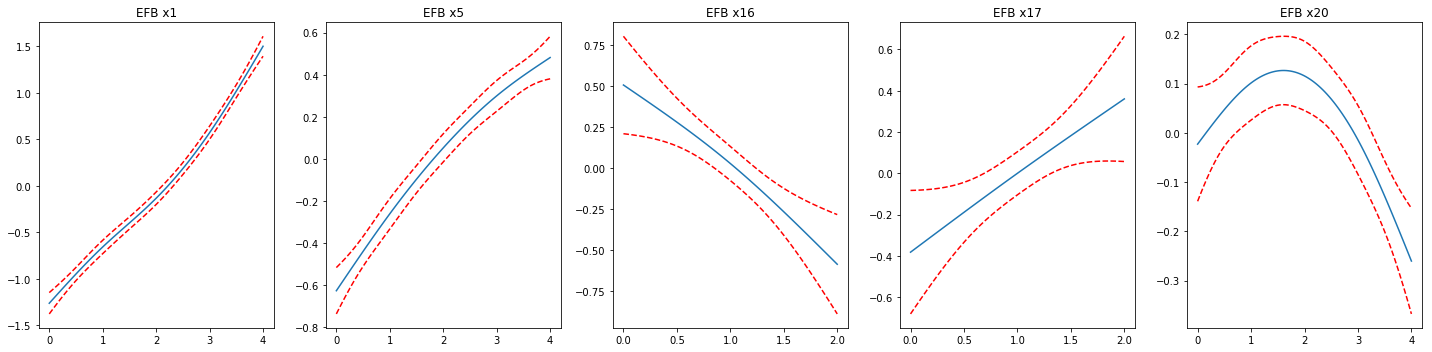

In [11]:
gam_bin = LogisticGAM(s(0)+s(1)+s(2)+s(3)+s(4)).fit(x_train_bin, y_train)

# some parameters combinations in grid search meet the error exception.
gam_bin.gridsearch(x_train_bin.values,y_train)

# plotting
fig, axs = plt.subplots(1,5,figsize=(20,5))
names = x_train_bin.columns
for i, ax in enumerate(axs.flatten()):
    XX = gam_bin.generate_X_grid(term=i)
    plt.subplot(ax)
    plt.plot(XX[:, i], gam_bin.partial_dependence(term=i, X=XX))
    plt.plot(XX[:, i], gam_bin.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    plt.title(names[i])
plt.tight_layout()

## (2) Piecewise-linear

In [12]:
def PieceReLU(x, tau):
    xphi = x
    for k in range(len(tau)):
        tmp = [max(x1-tau[k], 0) for x1 in x]
        xphi = np.column_stack((xphi, tmp))
    return xphi

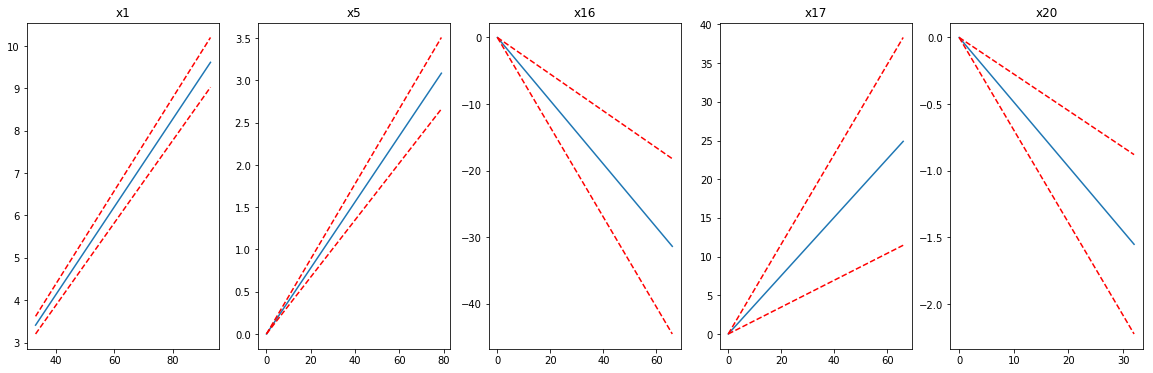

In [13]:
fig, axes = plt.subplots(1, 5,figsize=(20,6))
titles = features

gam_piece = LogisticGAM(l(0)+l(1)+l(2)+l(3)+l(4))

K=10
for i in range(5):
    x = x_train.iloc[:,i].values
    tau = np.linspace(x.min(),x.max(),K+2)[1:-1]
    
    gam_piece.n_splines[i] = PieceReLU(x,tau)

gam_piece.fit(x_train, y_train)
#gam_piece.gridsearch(x_train.values,y_train)

for i, ax in enumerate(axes):
    XX = gam_piece.generate_X_grid(term=i)
    pdep, confi = gam_piece.partial_dependence(term=i, width=.95)

    plt.subplot(axes[i])
    plt.plot(XX[:, i], pdep)
    plt.plot(XX[:, i], confi, c='r', ls='--')
    plt.title(titles[i])

## (3) penalized B-splines

100% (11 of 11) |########################| Elapsed Time: 0:00:07 Time:  0:00:07


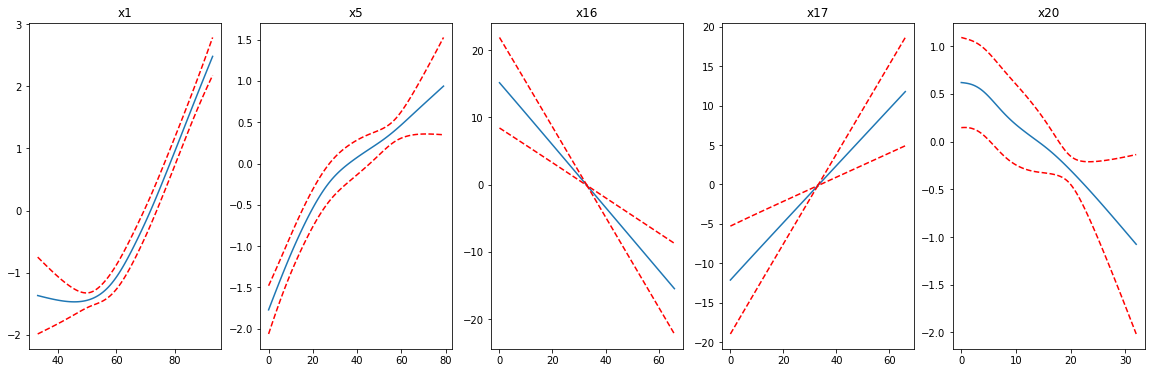

In [14]:
from patsy import dmatrix

fig, axes = plt.subplots(1, 5,figsize=(20,6))
titles = features

gam_bs = LogisticGAM(s(0)+s(1)+s(2)+s(3)+s(4), penalties='derivative')

for i in range(5):
    x = x_train.iloc[:,i].values.reshape([-1,1])
    gam_bs.n_splines[i] = dmatrix("bs(x, df=4, degree=3, include_intercept=True) - 1", {"x": x})
    
#gam_bs.fit(x_train, y_train)
gam_bs.gridsearch(x_train.values,y_train)

for i, ax in enumerate(axes):
    XX = gam_bs.generate_X_grid(term=i)
    pdep, confi = gam_bs.partial_dependence(term=i, width=.95)

    plt.subplot(axes[i])
    plt.plot(XX[:, i], pdep)
    plt.plot(XX[:, i], confi, c='r', ls='--')
    plt.title(titles[i])

# (4) Evaluation

In [15]:
gam_bin.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     14.1579
Link Function:                        LogitLink Log Likelihood:                                 -4799.1571
Number of Samples:                         8367 AIC:                                               9626.63
                                                AICc:                                            9626.6886
                                                UBRE:                                               3.1519
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1711
Feature Function                  Lam

C:\Users\hadje\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [16]:
gam_piece.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      5.9871
Link Function:                        LogitLink Log Likelihood:                                 -4765.2663
Number of Samples:                         8367 AIC:                                             9542.5068
                                                AICc:                                            9542.5201
                                                UBRE:                                               3.1411
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.177
Feature Function                  Lam

C:\Users\hadje\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [17]:
gam_bs.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     12.6214
Link Function:                        LogitLink Log Likelihood:                                 -4735.2455
Number of Samples:                         8367 AIC:                                             9495.7338
                                                AICc:                                            9495.7815
                                                UBRE:                                               3.1361
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1821
Feature Function                  Lam

C:\Users\hadje\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


### Explainability
The partial dependency plot uncovers the explainability of each model.<br>
x1, x5 and x17 has positive correlation with RiskFlag while x16, x20 has negative correlation. However, the correlations have some differences between models. For example, x1 has negative correlation with the response variable at first in penalized B-spline GAM while not in other models. Also, x20 in binning GAM has positive then negative correlation to RiskFlag.

### Accuracy / Model selection

In [18]:
y_pred_train = gam_bin.predict(x_train_bin)
y_pred_test = gam_bin.predict(x_test_bin)

print('The Acc on training set:',accuracy_score(y_train,y_pred_train))
print('The Acc on testing set:',accuracy_score(y_test,y_pred_test))

The Acc on training set: 0.7037169833871161
The Acc on testing set: 0.7127151051625239


In [19]:
y_pred_train = gam_piece.predict(x_train)
y_pred_test = gam_piece.predict(x_test)

print('The Acc on training set:',accuracy_score(y_train,y_pred_train))
print('The Acc on testing set:',accuracy_score(y_test,y_pred_test))

The Acc on training set: 0.7077805665112944
The Acc on testing set: 0.7280114722753346


In [20]:
y_pred_train = gam_bs.predict(x_train)
y_pred_test = gam_bs.predict(x_test)

print('The Acc on training set:',gam_bs.accuracy(x_train, y_train))
print('The Acc on testing set:',accuracy_score(y_test,y_pred_test))

The Acc on training set: 0.7101709095255169
The Acc on testing set: 0.7251434034416826


Recommand penalized B-spline GAM.<br>
It has similar accuracy to ReLU GAM but has lower AIC and higher pseudo R squared-values than any other models.<br>
However, the overall accuracy of all models are not very satisfying. Therefore, different model types, different adjustment on missing values or any other methods may be considered to check whether they have significant impact on model performance.